In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

Importing all the necessary libraries.

In [49]:
def polyModel(x,theta):
    y = np.zeros(len(x))
    for i in range(len(theta)):
      y += theta[i] * (x ** i)
    return y

The polyModel function takes x and theta arrays as arguments that represent the parameters of the following polynomial:

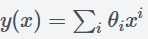




In [50]:
x_values= np.arange(0, 1, 0.1)
theta_values = np.arange(1, 10, dtype = float)

Storing values of x and theta to produce arrays of length 10 to test the function.

In [51]:
y_values = polyModel(x_values, theta_values)
print(y_values)

[ 1.          1.23456789  1.56249344  2.04052309  2.77311744  3.95703125
  5.96026624  9.45212949 15.60475904 26.39010709]


Printing the resulting values to see if the function works as intended. We get a 1D array with 10 values as intended, therefore the function works correctly.

In [52]:
def polyModelWithNoise(x,theta,sigma):
    y = np.zeros(len(x))
    sigma_values = np.random.normal(0, sigma, len(x))
    for i in range(len(theta)):
      y += theta[i] * (x ** i)
    y += sigma_values
    return y

The polyModelWithNoise function generates polynomial data based on the same polynomial mentioned previously with gaussian noise.

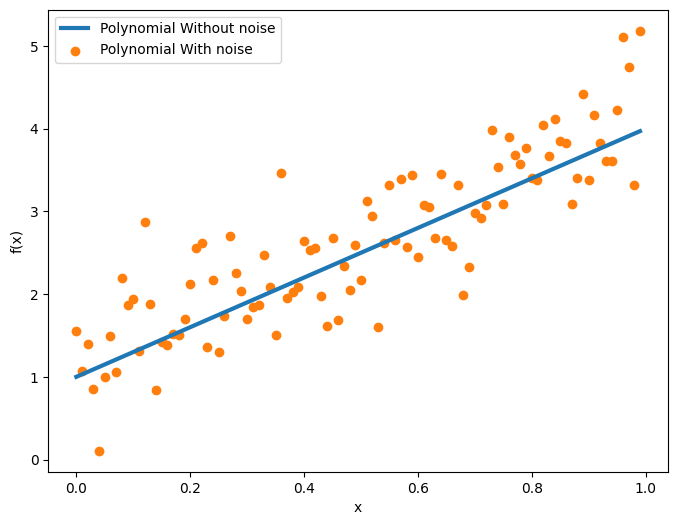

In [53]:
x_values= np.arange(0, 1, 0.01)
theta_1 = [1,3]

function_1 = polyModel(x_values, theta_1)
function_2 = polyModelWithNoise(x_values, theta_1, 0.5)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_values,function_1,linewidth=3,label=r"Polynomial Without noise")
ax.scatter(x_values,function_2,label=r'Polynomial With noise', color ='C1')
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()

The purpose of this code is to show how a polynomial with theta = [1,3] parameters differs from the one that is generated with noise. This plot demonstrates the difference between the true model and the noise model.

In [54]:
def true_polyModel(x):
  return polyModel(x, [1, 3])

function for initilising polyModel using a fixed true parameter [1,3]. It is useful because later on this true parameter changes and it is easy to implement these changes with this short function.

In [55]:
def polyGradient(x,theta):

   grad = np.zeros((len(theta), len(x)))
   for i in range (len(theta)):
       grad[i, :] = x**i

   return grad

The polyGradient function returns the gradient for each theta over all x. As the gradient of the polynomial in this question is its first derivative, the code simply simplifies to x to the power of i for the defintion of the gradient.


In [56]:
def MeanSqrdError(y_data, y_model):
    difference = y_model - y_data
    return 0.5 * np.mean(difference**2)

The MeanSqrdError function computes the mean squared error (MSE) between the data and model predictions. This is the function that the gradient descent will later on be minimising.

In [57]:
def generate_random_x_values(n):

    x_values_random = np.random.uniform(low=0.0, high=1.0, size=n)

    return x_values_random

Takes n random samples from a uniform distrubution of numbers from 0.1 and stores them in x_values_random.

In [58]:
numSteps = 100
theta = np.array([-1,0.5])
eta = 0.5
mseArray = np.zeros(numSteps)
thetaArray = np.zeros((numSteps + 1,2))
thetaArray[0] = theta
n=10

for i in range(numSteps):
    x = generate_random_x_values(n)
    y_data = polyModelWithNoise(x, [1,3], 0.5)
    y_model = polyModel(x, theta)
    difference = y_data - y_model
    mse = MeanSqrdError(y_data, y_model)
    mseArray[i] = mse
    grad = polyGradient(x, theta)
    theta += eta*np.average(difference[None,:]*grad,axis=1)
    thetaArray[i+1] = theta

print('Final Theta', theta)

Final Theta [0.98936776 2.99851652]


Here theta is defined as [-1,0.5]. mseArray and thetaArray track the theta and mse values across the loop.

Step by step functionality in the loop:
- Generating new set of n points with each iteration of the loop.
- Generating new noise data with the true theta parameter of [1,3].
- Generating model data with the previously defined theta.
- Difference between the predicted and model data is calculated
- MSE is calculated and stored in an erray
- Gradient is calculated w.r.t theta.
- Minimising the MSE.

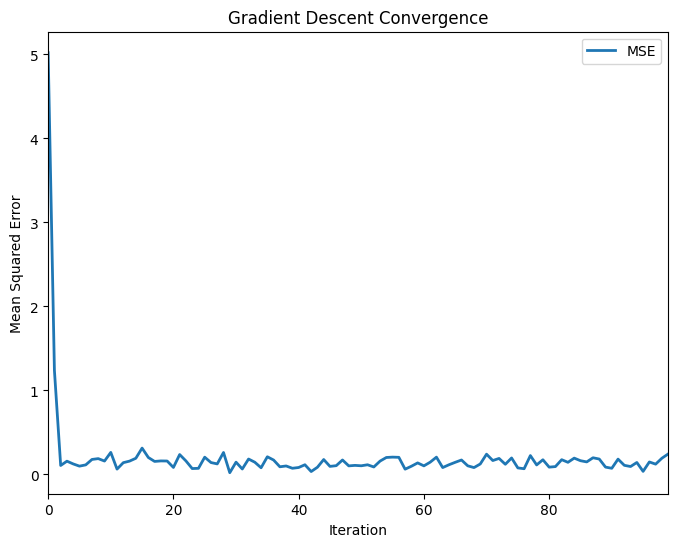

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
count = np.arange(numSteps)

ax.plot(count, mseArray, linewidth=2,label='MSE')
ax.set_title("Gradient Descent Convergence")
ax.set_xlabel("Iteration")
ax.set_ylabel("Mean Squared Error")
ax.set_xlim([0, numSteps - 1])
ax.legend()

plt.show()

Visualisation of the change in MSE over 100 iterations of stochastic gradient descent. This graph is necessary to understand if the learning rate is right or not. As the graph is going down, this implies the gradient is converging, and the learning rate is fine as it is set now.

In [60]:
true_theta = [1, 4, 3, 2]
sigma = 0.5
numSteps = 100
batchSize = 10
eta = 0.5

def curveFitting(degree, true_theta, sigma, numSteps, batchSize, eta):
    theta = np.zeros(degree + 1)
    thetaArray = np.zeros((numSteps + 1, degree + 1))
    mseArray = np.zeros(numSteps)
    thetaArray[0] = theta

    for i in range (numSteps):
      x_batch = generate_random_x_values(batchSize)
      y_data = polyModelWithNoise(x_batch, true_theta, sigma)
      y_model = polyModel(x_batch, theta)
      difference = y_data - y_model
      mse = MeanSqrdError(y_data, y_model)
      mseArray[i] = mse
      grad = polyGradient(x_batch, theta)
      theta += eta*np.average(difference[None,:]*grad,axis=1)
      thetaArray[i+1] = theta

    return thetaArray, mseArray

The function curveFitting generates a polynomial model with the specified degree.

SGD loop step by step functionallity:

*   The number of iterations in the loop is determined by numStep varibale in this case it equals 100
*   Samples batchSize = 10 of random x values.
*   Generates noisy data from true value of theta [1, 4, 3, 2]
*   Generates gradient with the previously mentioned polyGradient function and then updates theta in the next line.
*   Calculates mse for the data and stores all the updated theta values along with mse values in arrays for plotting.

By changing the degree value in this function you can asses how different degree polynomials fit the data and how MSE evolves.

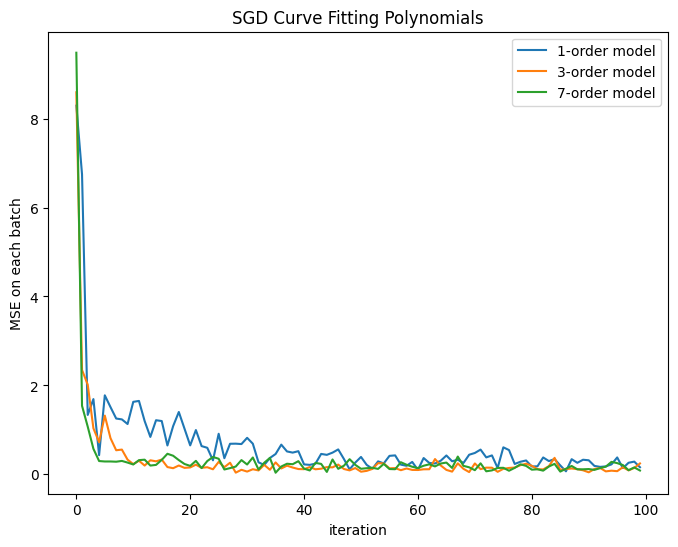

In [61]:
degrees_fit = [1,3,7]
true_theta = [1, 4, 3, 2]
sigma = 0.5
numSteps = 100
batchSize = 10
eta = 0.5

fig, ax = plt.subplots(figsize=(8,6))

for degree in degrees_fit:
    thetaArray, mseArray = curveFitting(degree, true_theta, sigma, numSteps, batchSize, eta)
    label_txt = f"{degree}-order model"
    ax.plot(mseArray, label=label_txt)

ax.set_title('SGD Curve Fitting Polynomials')
ax.set_xlabel('iteration')
ax.set_ylabel('MSE on each batch')
ax.legend()
plt.show()

Here there is a loop over degrees = [1, 3, 7] and with each iteration the curveFitting function is being called. Finally, a plot is produced for the MSE across iterations for each model. This plot helps visualise how each polynomial order converges and makes it easier to compare the effectivness of the fit to the previous data we have obtained.

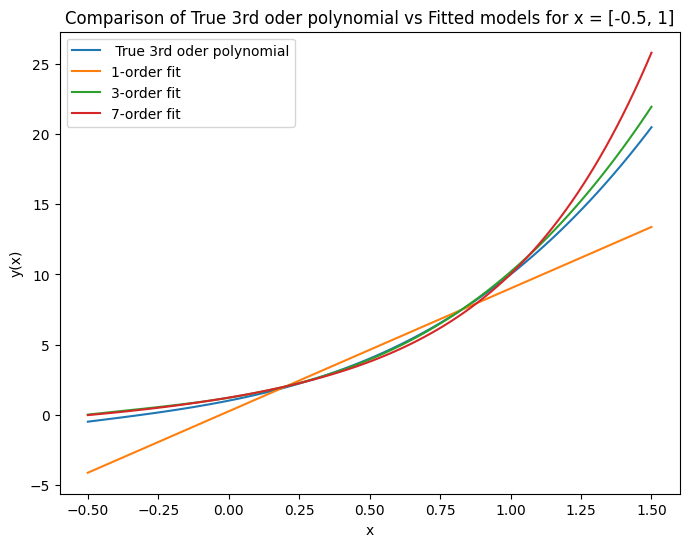

In [62]:
x_plot = np.linspace(-0.5, 1.5 , 100)
y_plot = polyModel(x_plot, true_theta)
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x_plot,y_plot, label = ' True 3rd oder polynomial')

for degree in degrees_fit:
    thetaArray, _ = curveFitting(degree, true_theta, sigma, numSteps, batchSize, eta)
    theta_final = thetaArray[-1]
    y_model_plot = polyModel(x_plot, theta_final)
    ax.plot(x_plot, y_model_plot, label=f"{degree}-order fit")

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparison of True 3rd oder polynomial vs Fitted models for x = [-0.5, 1]')
plt.legend()
plt.show()

This plot displays the true 3rd order polynomial with the previous parameters just over a broader domain of [-0.5, 1,5] compared to each fitted model over the same broad domain. The expectation is that 1st order model will likely underfit the data, the 3rd degree polynomial should be the best match, and the 7th order will likely overfit.

Graph analysis:

From this graph we can gather that the first oder polynomial significantly underfits the data and is unable to match the curvature of the true 3rd order polynomial inside the [0,1] range and then significantly diverges from the true polynomial outside of the said range, therefore this is a relatively poor fit.
The 3rd order polynomial matches the true polynomial very closely inside and outside of the [0,1] range and the curvature is captured very accurately, the model matches the true data quite well. For the 7th order polynomial, it follows the data quite well from the start but experiences an oscillation and a sudden peak towards the end where where the data is overfit outside of the [0,1] domain, therefore the match is not very accurate.

Conclusion:

The code successfully completes the task of comparing the true polynomial models to the fittes ones. These graphs provide valuable insights into how the slight changes in parameters can produce very different results and how plots help to visualise the functions at work.